In [2]:
from syllable_counters import syllable_count_sentence_en, syllable_count_sentence_jp
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/raw', delimiter='\t', header=None)
df.columns = ['en', 'jp']

In [4]:
df['en_syllables'] = df.en.apply(lambda x: syllable_count_sentence_en(x))

In [6]:
df['jp_syllables'] = df.jp.apply(lambda x: syllable_count_sentence_jp(x))

In [11]:
df

,en,jp,en_syllables,jp_syllables,en_words,jp_words,en_letters,jp_letters
0,"you are back, aren't you, harold?",あなたは戻ったのね ハロルド?,8,14,6,15,33,15
1,my opponent is shark.,俺の相手は シャークだ。,6,10,4,12,21,12
2,this is one thing in exchange for another.,引き換えだ ある事とある物の,11,15,8,14,42,14
3,"yeah, i'm fine.",もういいよ ごちそうさま ううん,3,12,3,16,15,16
4,don't come to the office anymore. don't call m...,もう会社には来ないでくれ 電話もするな,14,19,10,19,55,19
...,...,...,...,...,...,...,...,...
2698097,what good would that have done?,知って何の意味がある?,6,8,6,11,31,11
2698098,when ichinosukesan rushed over to ninosukesan..,二之助さんに駆け寄った 一之助さんは,16,21,6,18,47,18
2698099,your words are so encouraging.,そういった お言葉を力に...。,8,13,5,16,30,16
2698100,"goodbye, george.",切るぞ,3,3,2,3,16,3


In [8]:
df['en_words'] = df.en.apply(lambda x: x.count(' ')+1)
df['jp_words'] = df.jp.apply(lambda x: len(x))
df['en_letters'] = df.en.apply(lambda x: len(x))
df['jp_letters'] = df.jp.apply(lambda x: len(x))

In [9]:
en_syl_freq = df.groupby('en_syllables').en.count()
jp_syl_freq = df.groupby('jp_syllables').jp.count()

en_wrd_freq = df.groupby('en_words').en.count()
jp_wrd_freq = df.groupby('jp_words').jp.count()

en_let_freq = df.groupby('en_letters').en.count()
jp_let_freq = df.groupby('jp_letters').jp.count()

In [10]:
df

,en,jp,en_syllables,jp_syllables,en_words,jp_words,en_letters,jp_letters
0,"you are back, aren't you, harold?",あなたは戻ったのね ハロルド?,8,14,6,15,33,15
1,my opponent is shark.,俺の相手は シャークだ。,6,10,4,12,21,12
2,this is one thing in exchange for another.,引き換えだ ある事とある物の,11,15,8,14,42,14
3,"yeah, i'm fine.",もういいよ ごちそうさま ううん,3,12,3,16,15,16
4,don't come to the office anymore. don't call m...,もう会社には来ないでくれ 電話もするな,14,19,10,19,55,19
...,...,...,...,...,...,...,...,...
2698097,what good would that have done?,知って何の意味がある?,6,8,6,11,31,11
2698098,when ichinosukesan rushed over to ninosukesan..,二之助さんに駆け寄った 一之助さんは,16,21,6,18,47,18
2698099,your words are so encouraging.,そういった お言葉を力に...。,8,13,5,16,30,16
2698100,"goodbye, george.",切るぞ,3,3,2,3,16,3


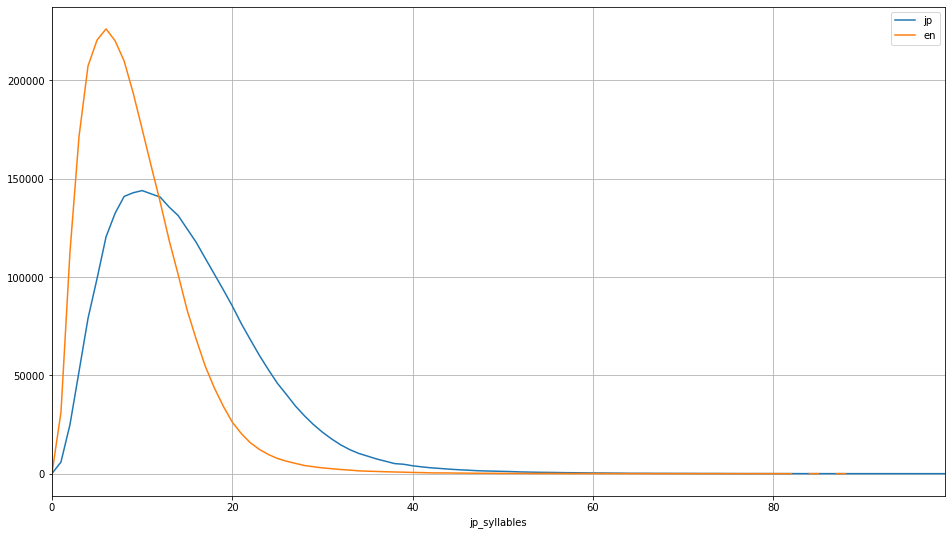

In [18]:
res = pd.DataFrame(jp_syl_freq[:100]).join(en_syl_freq[:100]).plot(figsize=(16, 9), grid=True)

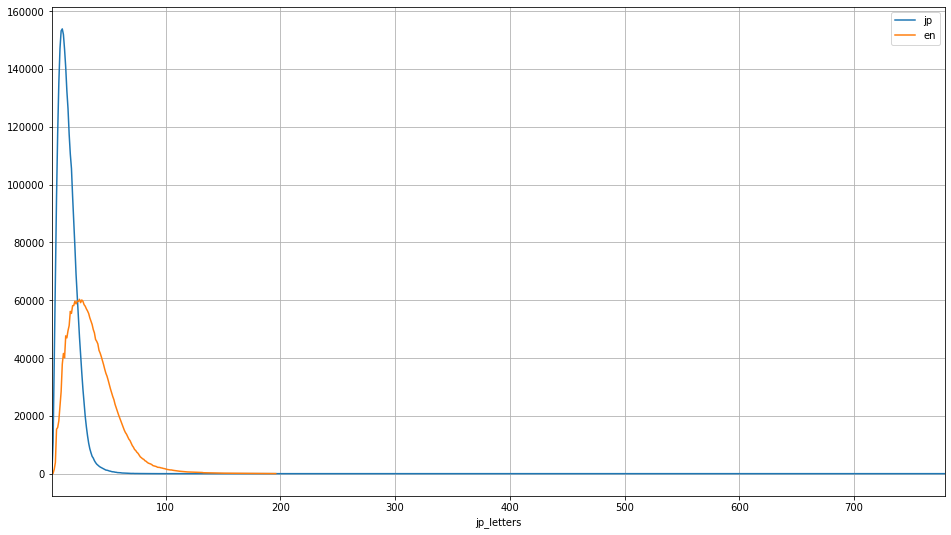

In [19]:
pd.DataFrame(jp_let_freq[:200]).join(en_let_freq[:200]).plot(figsize=(16, 9), grid=True)

In [20]:
ratios = (df.jp_syllables / df.en_syllables).replace([np.inf, -np.inf], np.nan).dropna()

In [21]:
(df.jp_syllables / df.en_syllables).replace([np.inf, -np.inf], np.nan).dropna().plot()

0          1.750000
1          1.666667
2          1.363636
3          4.000000
4          1.357143
             ...   
2698097    1.333333
2698098    1.312500
2698099    1.625000
2698100    1.000000
2698101    2.500000
Length: 2698029, dtype: float64

In [62]:
buckets = [i*0.2 for i in range(50)]
a = pd.cut(ratios, buckets)

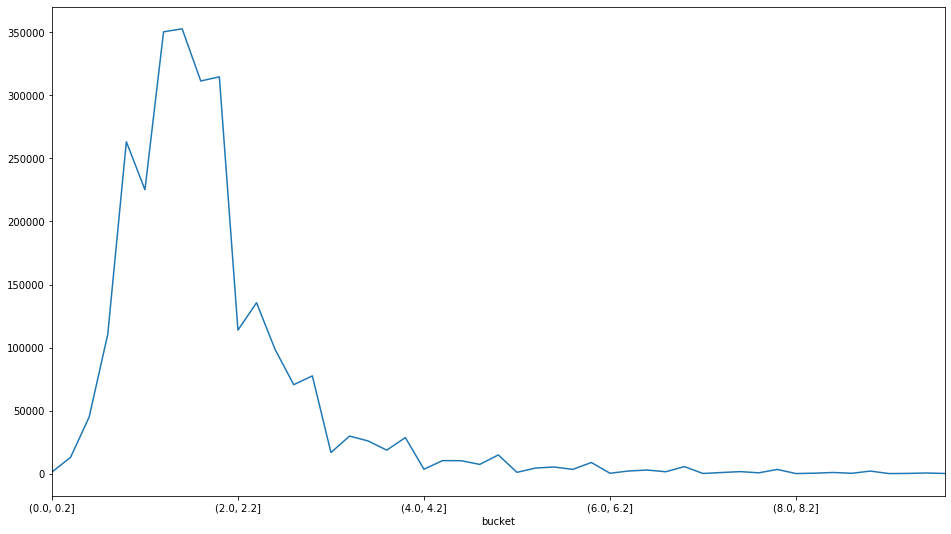

In [63]:
pd.DataFrame(a, columns=['bucket']).groupby('bucket').bucket.count().plot(figsize=(16, 9))

In [59]:
ratios.mean()

2.020046123166394